# Introduction: Shapely, GeoJSON, and GeoPandas

[Shapely](https://shapely.readthedocs.io/en/latest/) is a package for geometric operations. [GeoJSON](https://geojson.org/) is a format for encoding geospatial data. [GeoPandas](https://geopandas.org/) adds the power of pandas to spatial data manipulation.

In [106]:
from shapely import geometry
import geopandas as gpd
import geojson, json
import matplotlib.pyplot as plt

### Shapely hello world

In [68]:
# Geometry types include Points, LineStrings, LinearRings, Polygons, MultiPoints, MultiLineStrings, and MultiPolygons
# Make some simple geometries
point_A = geometry.Point([5,7])
point_B = geometry.Point([15,2])
linestring_A = geometry.LineString([[-10,10],[0,5],[10,-3]])
linestring_B= geometry.LineString([[9,0],[7,3],[8,12]])
linearring = geometry.LinearRing([[0,0],[-10,0],[-10,10],[10,20],[20,10]])
polygon_A = geometry.Polygon([[0,0],[-10,0],[-10,10],[10,20],[20,10]])
polygon_B = geometry.Polygon([[0,0],[0,5],[5,5],[5,0]])
multipoint = geometry.MultiPoint([point_A,point_B])
multiline = geometry.MultiLineString([linestring_A, linestring_B])
multipolygon = geometry.MultiPolygon([polygon_A, polygon_B])

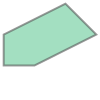

In [26]:
# ipython is kind enough to visualise single shapes for us
polygon_A

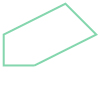

In [35]:
# Polygons are made of an exterior linearring plus a number of linearring holes.
linearring

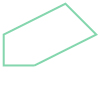

In [36]:
polygon_A.exterior

In [43]:
# a list of (x,y) coords is available on linearringsa and linestrings
list(linearring.coords), list(linestring.coords)

([(0.0, 0.0),
  (-10.0, 0.0),
  (-10.0, 10.0),
  (10.0, 20.0),
  (20.0, 10.0),
  (0.0, 0.0)],
 [(-10.0, 10.0), (0.0, 5.0), (10.0, -3.0)])

In [47]:
# unzipped x and y components can be accessed with .xy
linearring.xy, linestring_A.xy, point_A.xy

((array('d', [0.0, -10.0, -10.0, 10.0, 20.0, 0.0]),
  array('d', [0.0, 0.0, 10.0, 20.0, 10.0, 0.0])),
 (array('d', [-10.0, 0.0, 10.0]), array('d', [10.0, 5.0, -3.0])),
 (array('d', [5.0]), array('d', [7.0])))

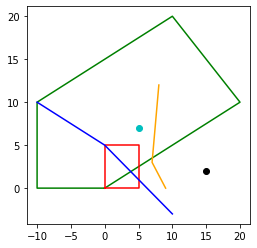

In [77]:
# we can also use matplotlib for visualisation
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(*polygon_A.exterior.xy, c='g')
ax.plot(*polygon_B.exterior.xy, c='r')
ax.plot(*linestring_A.xy,c='b')
ax.plot(*linestring_B.xy,c='orange')
ax.scatter(point_A.x, point_A.y, c='c')
ax.scatter(point_B.x, point_B.y, c='k')
plt.show()

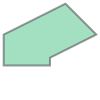

In [49]:
# we can do lots of geometric operations with our shapes
polygon_A.union(polygon_B)

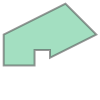

In [50]:
polygon_A.difference(polygon_B)

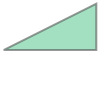

In [51]:
polygon_B.difference(polygon_A)

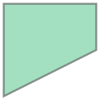

In [52]:
polygon_B.intersection(polygon_A)

In [70]:
# including boolean tests
polygon_A.contains(point_A), polygon_A.contains(point_B), polygon_A.intersects(linestring_A), polygon_B.intersects(linestring_B)

(True, False, True, False)

In [60]:
# let's create some holes and remove them from polygon_A
hole_1 = geometry.Polygon([[0,5],[7,5],[7,10]])
hole_2 = geometry.Polygon([[10,10],[12,10],[12,12],[10,12]])
polygon_C = polygon_A.difference(hole_1).difference(hole_2)

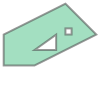

In [61]:
polygon_C

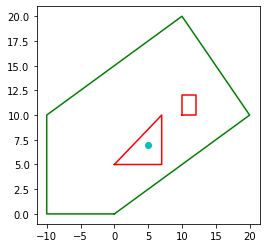

False

In [76]:
# With matplotlib we need to plot the holes separately, which are accessible as linearrings via .interiors
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(*polygon_C.exterior.xy, c='g')
for hole in polygon_C.interiors:
    ax.plot(*hole.xy, c='r')
ax.scatter(point_A.x, point_A.y, c='c')
plt.show()
polygon_C.intersects(point_A)

### GeoJSON Hello World

the GeoJSON spec uses Features and FeatureCollections. Features have a geometry and some properties, FeatureCollections have a list of features and potentially some properties

In [97]:
# geojson will automatically parse shapely geometries
feature_A = geojson.Feature(geometry=polygon_A, properties={'foo':'cat','legs':4})
feature_B = geojson.Feature(geometry=polygon_B, properties={'foo':'kangaroo','legs':2})
feature_C = geojson.Feature(geometry=linestring_A, properties={'foo':'snake','legs':0})

In [98]:
feature_A

{"geometry": {"coordinates": [[[0.0, 0.0], [-10.0, 0.0], [-10.0, 10.0], [10.0, 20.0], [20.0, 10.0], [0.0, 0.0]]], "type": "Polygon"}, "properties": {"foo": "cat", "legs": 4}, "type": "Feature"}

In [99]:
featurecollection=geojson.FeatureCollection([feature_A, feature_B, feature_C],properties={'bar':'baz'})

In [100]:
featurecollection

{"features": [{"geometry": {"coordinates": [[[0.0, 0.0], [-10.0, 0.0], [-10.0, 10.0], [10.0, 20.0], [20.0, 10.0], [0.0, 0.0]]], "type": "Polygon"}, "properties": {"foo": "cat", "legs": 4}, "type": "Feature"}, {"geometry": {"coordinates": [[[0.0, 0.0], [0.0, 5.0], [5.0, 5.0], [5.0, 0.0], [0.0, 0.0]]], "type": "Polygon"}, "properties": {"foo": "kangaroo", "legs": 2}, "type": "Feature"}, {"geometry": {"coordinates": [[-10.0, 10.0], [0.0, 5.0], [10.0, -3.0]], "type": "LineString"}, "properties": {"foo": "snake", "legs": 0}, "type": "Feature"}], "properties": {"bar": "baz"}, "type": "FeatureCollection"}

In [101]:
# dump features and featurecollections to file with json
json.dump(featurecollection,open('my_featurecollection.geojson','w'))

In [102]:
# load feature collections with json
featurecollection = json.load(open('my_featurecollection.geojson','r'))

In [105]:
# parse shapes from features back into shapely objects with geometry.shape:
for feature in featurecollection['features']:
    print(geometry.shape(feature['geometry']).type)

Polygon
Polygon
LineString


In [110]:
# the text mapping for a shapely geometry can also be accessed using geometry.mapping:
# (why? e.g. some libraries, infuriatingly, don't accept parentheses/tuples for shape definitions.)
geometry.mapping(polygon_A)

{'type': 'Polygon',
 'coordinates': (((0.0, 0.0),
   (-10.0, 0.0),
   (-10.0, 10.0),
   (10.0, 20.0),
   (20.0, 10.0),
   (0.0, 0.0)),)}

### GeoPandas Hello World

Geopandas combines the amazing vectorisation and io of pandas with geometry operations of shapely, as well as other geospatial libraries.

In [115]:
gdf = gpd.read_file('my_featurecollection.geojson').set_index('foo')

In [116]:
gdf

,legs,geometry
foo,,
cat,4,"POLYGON ((0.00000 0.00000, -10.00000 0.00000, ..."
kangaroo,2,"POLYGON ((0.00000 0.00000, 0.00000 5.00000, 5...."
snake,0,"LINESTRING (-10.00000 10.00000, 0.00000 5.0000..."


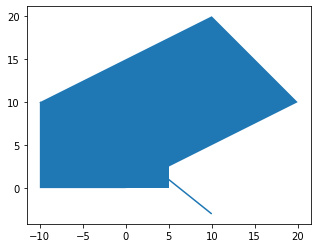

In [117]:
gdf.plot()